In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc

GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha']


Files:
 ['phb150_c004.dat', 'phb150_c005.dat', 'phb150_c006.dat', 'phb150_c008.dat', 'phb150_c010.dat', 'phb150_c015.dat', 'phb150_c020.dat', 'phb150_c030.dat', 'phb150_c040.dat', 'phb150_c050.dat']
[85.75615189679003, 86.56991136345069, 87.2717901234568, 88.45465732087226, 89.40010061205666, 91.106369324276, 92.20910745742806, 93.51863731109954, 94.27426672121088, 94.75445006321114]


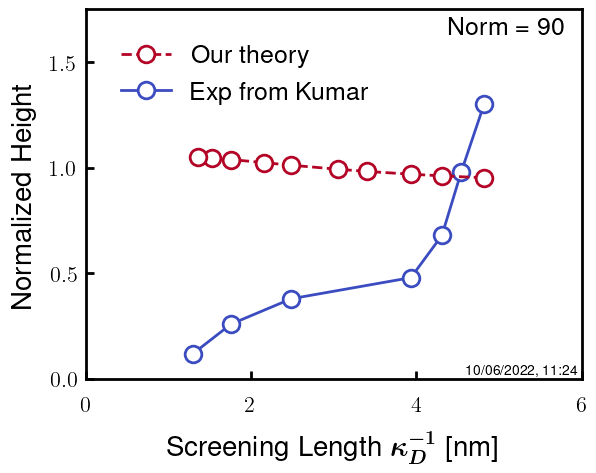

In [3]:
## NFH
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb150_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

b0 = 1.5 ########################################################

LH = np.zeros(len(read_list))
print("[", end="")
for i in range(len(read_list)): 
  LH[i] = tjy.H_find(read_list[i], b0=b0, thresh=1e-04)
  print(LH[i], end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

####################

from datetime import datetime

SrCs = [float(i) for i in labs]
Sr_equil = LH
#Sr_equil = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 5.492755796178344, 5.367826231386024, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]
#Sr_meta = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 8.499643355392594, 7.995791556728231, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]

norm = 90 ############################################################

Sr_equil = np.divide(Sr_equil,  norm)
#Sr_meta = np.divide(Sr_meta, 21.5)
CsDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in SrCs]

#Sr2014 pH2.4 fitted in Illustrator
x = [4, 4.5, 5, 6, 15, 30, 55]
y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in x]

f, ax = plt.subplots(1,1)

ax.plot(CsDeb, Sr_equil, 'o--', color=warm_red, mew=2, ms=12, markerfacecolor='w', zorder=3, label="Our theory")
ax.plot(xDeb, y, 'o-', color=cool_blue, mew=2, ms=12, markerfacecolor='w',label="Exp from Kumar")

#ax.plot(CsDeb, Sr_equil, 'k', label="Our Theory")
#ax.plot(CsDeb, Sr_equil, 'r', mew=2.5,ms=12,markerfacecolor='w', zorder=3, label="Our theory")
#ax.plot(CsDeb[:len(Sr_meta)], Sr_meta, 'o-',color="0.6", mew=2.5,ms=12,markerfacecolor='w', zorder=2, label="Metastable")

plt.gca().text(0.85, 0.95, 'Norm = {:d}'.format(norm), transform=plt.gca().transAxes, fontsize=18,
       ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
plt.gca().text(0.88, 0.02, '{}'.format(datetime.now().strftime("%m/%d/%Y, %H:%M")), transform=plt.gca().transAxes, fontsize=10,
       ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
ax.set_title(r"")
ax.set_ylim(0, 1.75) #0.5
plt.yticks([0.0, 0.5, 1.0, 1.5])
plt.xticks([0, 2, 4, 6, 8])
ax.set_xlim(0,6) #2

ax.set_xlabel(r'Screening Length $\bm{\kappa_D^{-1}}$'+' [nm]')
ax.set_ylabel('Normalized Height')

leg = ax.legend(loc = 2,frameon=False,fontsize=18)
leg.get_frame().set_linewidth(0.0)

plt.show()

In [31]:
## NLH
read_list =  ['001', '002', '003', '005', '010', '025', '050', '100']
tack = [0]*len(read_list) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb10v10L_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(read_list)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

LH = np.zeros(len(read_list))
print("[", end="")
for i in range(len(read_list)): 
  print(tjy.H_find(read_list[i], b0=1.0, thresh=1e-04), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb10v10L_c001.dat', 'phb10v10L_c002.dat', 'phb10v10L_c003.dat', 'phb10v10L_c005.dat', 'phb10v10L_c010.dat', 'phb10v10L_c025.dat', 'phb10v10L_c050.dat', 'phb10v10L_c100.dat']
[4.595602353072689, 4.602396738385638, 4.608961171314099, 4.621387665198238, 4.650016781083143, 4.738895820217338, 4.851848339857909, 4.994140109890109]


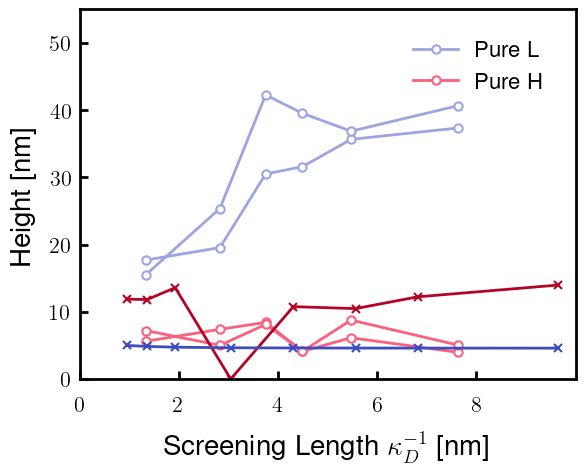

In [40]:
cs = [1, 2, 3, 5, 10, 25, 50, 100]
H = [13.977767269736841, 12.230987520347261, 10.480678101316315, 10.768363064008394, 0, 13.594751358969196, 11.822587615484462, 11.887211830309875]
L = [4.595602353072689, 4.602396738385638, 4.608961171314099, 4.621387665198238, 4.650016781083143, 4.738895820217338, 4.851848339857909, 4.994140109890109]
deb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in cs]

#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]

f, ax = plt.subplots(1,1)

ax.plot(EADdeb, EADL_1, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
ax.plot(EADdeb, EADL_2, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
ax.plot(EADdeb, EADH_1, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
ax.plot(EADdeb, EADH_2, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")


ax.plot(deb, H, color=warm_red, marker='x')
ax.plot(deb, L, color=cool_blue, marker='x')

plt.xticks([0, 2, 4, 6, 8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 55)
ax.set_title(r"")
ax.set_xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
ax.set_ylabel('Height' ' [nm]')

leg = ax.legend(frameon=False,fontsize=16)
leg.get_frame().set_linewidth(0.0)


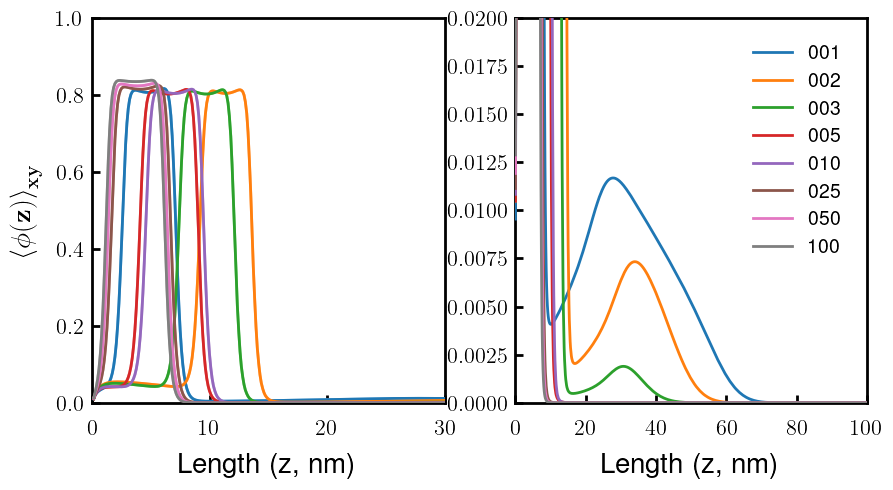

In [7]:
# labs = ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
# read_list = [GIT+"phb150_c"+i+".dat" for i in labs]
labs = ['001', '002', '003', '005', '010', '025', '050', '100']
read_list = [GIT+"phb10v10L_c"+i+".dat" for i in labs]

tjy.plot_pha(read_list, b0=1.0, x1_end=30, x2_end=100, y2_end=0.02, labs=labs, double=True)

In [ ]:
tjy.plot_anim(GIT+'it_a020c002_x150s002.dat', simname = GIT+'SIM.dat', lx=100)

it len  3881
nframes calc  3881
phn len  3882


Animation size has reached 21311026 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [4]:
"""def Gibbs(phAr, b0):
  dx = (phAr.iloc[1,0] - phAr.iloc[0, 0]) * b0 #Assuming equally spaced
  maxpt = np.argmax(phAr.iloc[:,1])

  sum = 0
  for i in range(maxpt, np.max(phAr.index)):
    sum += phAr.iloc[i, 1]
  sum *= dx 

  rGibbs =  sum / phAr.iloc[maxpt, 1] + phAr.iloc[maxpt, 0] *b0

  return rGibbs""";

In [6]:
def Gibbsf(filename, b0):
  df = pd.read_csv(filename, sep="\s+", skiprows=0)
  Nx = len(df.index)
  rows = range(0, Nx)

  phA = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phA = phA.fillna(0) # with 0s rather than NaNs

  for i in range(Nx):
    phA.iloc[i, 0] = df.iloc[i,0] * b0
    phA.iloc[i, 1] = df.iloc[i,1] 

  dx = (phA.iloc[1,0] - phA.iloc[0, 0]) #Assuming equally spaced
  maxpt = np.argmax(phA.iloc[:,1])

  sum = 0
  for i in range(maxpt, np.max(phA.index)):
    sum += phA.iloc[i, 1]
  sum *= dx 

  rGibbs =  sum / phA.iloc[maxpt, 1] + phA.iloc[maxpt, 0]

  return rGibbs

In [7]:
read_list = ['0506_01','0506_02','0506_03','d_04','0506_045','0506_05','d_06','d_08', '0506_15','0506_30','0506_50']  #['01','02','03','04','05','10','20','30','40','50']  #['000', '010', '020', '030', '040', '050','060','070','080','090', '100'] #['01','02','03','04','045','05','06','15','30','50'] 
read_list = ['ph'+i+'.dat' for i in read_list]

print("[", end="")
for i in range(len(read_list)): 
  print(Gibbsf(read_list[i], 0.6), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

[

FileNotFoundError: [Errno 2] No such file or directory: 'ph0506_01.dat'

In [8]:
read_list = ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125',
              '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
x = [float(i)/100 for i in read_list]
read_list = ['p1a0_x'+i+'.dat' for i in read_list]
H = [Gibbsf(i, 1.0) for i in read_list]

FileNotFoundError: [Errno 2] No such file or directory: 'p1a0_x040.dat'

In [9]:
plt.plot(x, H, 'o')

NameError: name 'H' is not defined

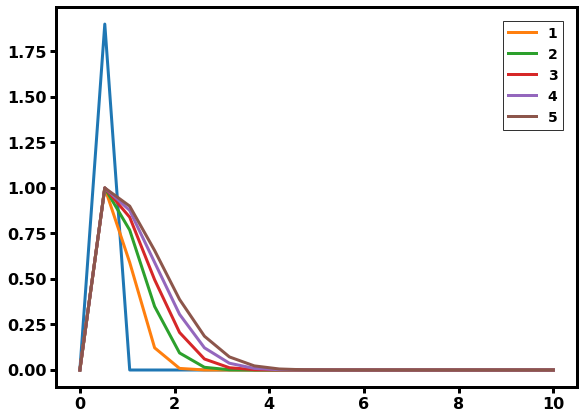

In [ ]:
plt.figure()
x = np.linspace(0,10,20)
dx = x[1]-x[0]
y = [0] + [1/dx]+[0]*(len(x)-2)
plt.plot(x, y)

for i in [1, 2, 3, 4, 5]:
  yg = np.exp(-(x-x[1])**2/(i*dx))
  yg[0] = 0    
  plt.plot(x, yg, label=i)
plt.legend()
plt.show()